The main goal is Predict the House Prices using Regression. 
Therefore, there would be finding the right features that helps the prediction less error.

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option('display.max_columns', 500)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/house-prices-advanced-regression-techniques/sample_submission.csv
/kaggle/input/house-prices-advanced-regression-techniques/data_description.txt
/kaggle/input/house-prices-advanced-regression-techniques/train.csv
/kaggle/input/house-prices-advanced-regression-techniques/test.csv


## **1. Get The Data**

Take a look at the the Data Structure

In [2]:
housing = pd.read_csv('../input/house-prices-advanced-regression-techniques/train.csv')
housing.head(10)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
5,6,50,RL,85.0,14115,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Mitchel,Norm,Norm,1Fam,1.5Fin,5,5,1993,1995,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,Wood,Gd,TA,No,GLQ,732,Unf,0,64,796,GasA,Ex,Y,SBrkr,796,566,0,1362,1,0,1,1,1,1,TA,5,Typ,0,NaN,Attchd,1993.0,Unf,2,480,TA,TA,Y,40,30,0,320,0,0,NaN,MnPrv,Shed,700,10,2009,WD,Normal,143000
6,7,20,RL,75.0,10084,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Somerst,Norm,Norm,1Fam,1Story,8,5,2004,2005,Gable,CompShg,VinylSd,VinylSd,Stone,186.0,Gd,TA,PConc,Ex,TA,Av,GLQ,1369,Unf,0,317,1686,GasA,Ex,Y,SBrkr,1694,0,0,1694,1,0,2,0,3,1,Gd,7,Typ,1,Gd,Attchd,2004.0,RFn,2,636,TA,TA,Y,255,57,0,0,0,0,NaN,NaN,NaN,0,8,2007,WD,Normal,307000
7,8,60,RL,NaN,10382,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,NWAmes,PosN,Norm,1Fam,2Story,7,6,1973,1973,Gable,CompShg,HdBoard,HdBoard,Stone,240.0,TA,TA,CBlock,Gd,TA,Mn,ALQ,859,BLQ,32,216,1107,GasA,Ex,Y,SBrkr,1107,983,0,2090,1,0,2,1,3,1,TA,7,Typ,2,TA,Attchd,1973.0,RFn,2,484,TA,TA,Y,235,204,228,0,0,0,NaN,NaN,Shed,350,11,2009,WD,Normal,200000
8,9,50,RM,51.0,6120,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,OldTown,Artery,Norm,1Fam,1.5Fin,7,5,1931,1950,Gable,CompShg,BrkFace,Wd Shng,None,0.0,TA,TA,BrkTil,TA,TA,No,Unf,0,Unf,0,952,952,GasA,Gd,Y,FuseF,1022,752,0,1774,0,0,2,0,2,2,TA,8,Min1,2,TA,Detchd,1931.0,Unf,2,468,Fa,TA,Y,90,0,205,0,0,0,NaN,NaN,NaN,0,4,2008,WD,Abnorml,129900
9,10,190,RL,50.0,7420,Pave,NaN,Reg,Lvl,AllPub,Corner,Gtl,BrkSide,Artery,Artery,2fmCon,1.5Unf,5,6,1939,1950,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,BrkTil,TA,TA,No,GLQ,851,Unf,0,140,991,Gas

In [3]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [4]:
housing.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1379.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,46.549315,567.240411,1057.429452,1162.626712,346.992466,5.844521,1515.463699,0.425342,0.057534,1.565068,0.382877,2.866438,1.046575,6.517808,0.613014,1978.506164,1.767123,472.980137,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,161.319273,441.866955,438.705324,386.587738,436.528436,48.623081,525.480383,0.518911,0.238753,0.550916,0.502885,0.815778,0.220338,1.625393,0.644666,24.689725,0.747315,213.804841,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,1900.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,223.000000,795.750000,882.000000,0.000000,0.000000,1129.500000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.000000,1961.000000,1.000000,334.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,0.000000,477.500000,991.500000,1087.000000,0.000000,0.000000,1464.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,6.000000,1.000000,1980.000000,2.000000,480.000000,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,0.000000,808.000000,1298.250000,1391.250000,728.000000,0.000000,1776.750000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,7.000000,1.000000,2002.000000,2.000000,576.000000,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,2336.000000,6110.000000,4692.000000,2065.000000,572.000000,5642.000000,3.000000,2.000000,3.000000,2.000000,8.000000,3.000000,14.000000,3.000000,2010.000000,4.000000,1418.000000,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


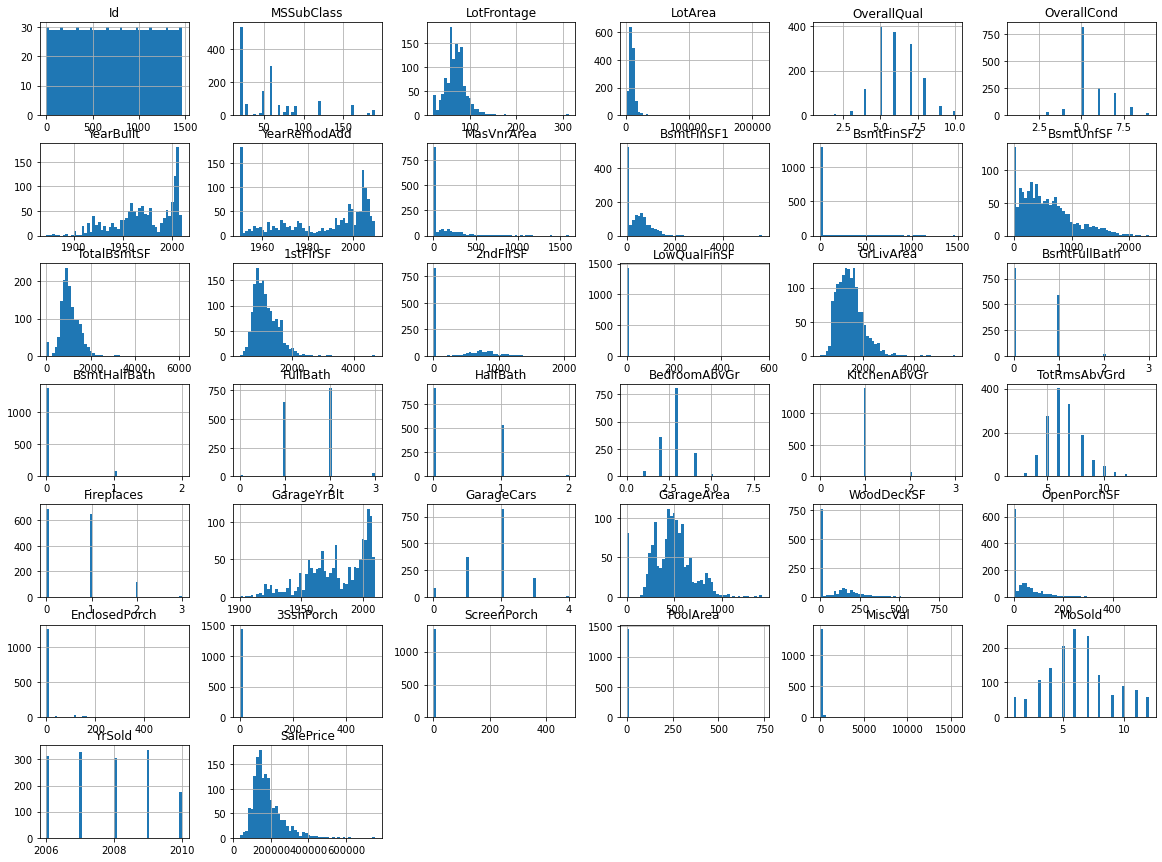

In [5]:
housing.hist(bins=50, figsize=(20,15))
plt.show()

### **Create a Test Set**

In [6]:
from sklearn.model_selection import train_test_split

train_set, test_set = train_test_split(housing, test_size=0.2, random_state=42)

## **Discover and Visualize the Data to Gain Insights**


- In this phase, we will copying the training dataset to play with. 
- Check missing values data
- Looking for correlations
- Experimenting with Attribute Combinations

In [7]:
housing1 = train_set.copy()

In [8]:
housing1.isnull().sum().sort_values(ascending = False).head(30)

PoolQC          1162
MiscFeature     1122
Alley           1094
Fence            935
FireplaceQu      547
LotFrontage      217
GarageYrBlt       64
GarageCond        64
GarageType        64
GarageFinish      64
GarageQual        64
BsmtQual          28
BsmtCond          28
BsmtFinType2      28
BsmtFinType1      28
BsmtExposure      28
MasVnrArea         6
MasVnrType         6
Electrical         1
Id                 0
Functional         0
Fireplaces         0
KitchenQual        0
KitchenAbvGr       0
BedroomAbvGr       0
HalfBath           0
FullBath           0
BsmtHalfBath       0
TotRmsAbvGrd       0
GarageCars         0
dtype: int64

Features **PoolQC, MiscFeature, Alley,and Fence** have a lot of missing values.
We'll drop these features from the consideration

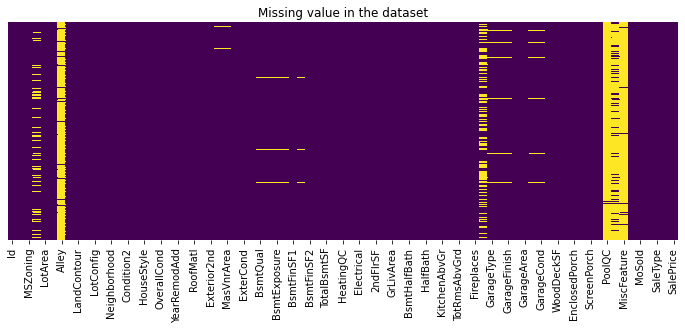

In [9]:
plt.figure(figsize=(12,4))
sns.heatmap(housing1.isnull(),cbar=False,cmap='viridis',yticklabels=False)
plt.title('Missing value in the dataset');

In [10]:
housing1.drop(['PoolQC', 'MiscFeature', 'Alley', 'Fence'], axis=1, inplace=True)

In [11]:
housing1.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
254,255,20,RL,70.0,8400,Pave,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,5,6,1957,1957,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,Gd,CBlock,TA,TA,No,Rec,922,Unf,0,392,1314,GasA,TA,Y,SBrkr,1314,0,0,1314,1,0,1,0,3,1,TA,5,Typ,0,NaN,Attchd,1957.0,RFn,1,294,TA,TA,Y,250,0,0,0,0,0,0,6,2010,WD,Normal,145000
1066,1067,60,RL,59.0,7837,Pave,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,6,7,1993,1994,Gable,CompShg,VinylSd,VinylSd,None,0.0,Gd,TA,PConc,Gd,TA,No,Unf,0,Unf,0,799,799,GasA,Gd,Y,SBrkr,799,772,0,1571,0,0,2,1,3,1,TA,7,Typ,1,TA,Attchd,1993.0,RFn,2,380,TA,TA,Y,0,40,0,0,0,0,0,5,2009,WD,Normal,178000
638,639,30,RL,67.0,8777,Pave,Reg,Lvl,AllPub,Inside,Gtl,Edwards,Feedr,Norm,1Fam,1Story,5,7,1910,1950,Gable,CompShg,MetalSd,Wd Sdng,None,0.0,TA,TA,CBlock,Fa,TA,No,Unf,0,Unf,0,796,796,GasA,Gd,Y,FuseA,796,0,0,796,0,0,1,0,2,1,TA,4,Typ,0,NaN,NaN,NaN,NaN,0,0,NaN,NaN,P,328,0,164,0,0,0,0,5,2008,WD,Normal,85000
799,800,50,RL,60.0,7200,Pave,Reg,Lvl,AllPub,Corner,Gtl,SWISU,Feedr,Norm,1Fam,1.5Fin,5,7,1937,1950,Gable,CompShg,Wd Sdng,Wd Sdng,BrkFace,252.0,TA,TA,BrkTil,Gd,TA,No,ALQ,569,Unf,0,162,731,GasA,Ex,Y,SBrkr,981,787,0,1768,1,0,1,1,3,1,Gd,7,Typ,2,TA,Detchd,1939.0,Unf,1,240,TA,TA,Y,0,0,264,0,0,0,0,6,2007,WD,Normal,175000
380,381,50,RL,50.0,5000,Pave,Reg,Lvl,AllPub,Inside,Gtl,SWISU,Norm,Norm,1Fam,1.5Fin,5,6,1924,1950,Gable,CompShg,BrkFace,Wd Sdng,None,0.0,TA,TA,BrkTil,TA,TA,No,LwQ,218,Unf,0,808,1026,GasA,TA,Y,SBrkr,1026,665,0,1691,0,0,2,0,3,1,Gd,6,Typ,1,Gd,Detchd,1924.0,Unf,1,308,TA,TA,Y,0,0,242,0,0,0,0,5,2010,WD,Normal,127000


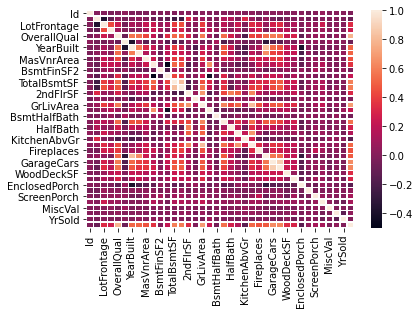

In [12]:
corr = housing1.corr()
sns.heatmap(corr, linewidths=0.5);

In [13]:
corr["SalePrice"].sort_values(ascending=False)

SalePrice        1.000000
OverallQual      0.785555
GrLivArea        0.695652
GarageCars       0.640991
GarageArea       0.624139
TotalBsmtSF      0.597766
1stFlrSF         0.587883
FullBath         0.552546
TotRmsAbvGrd     0.520388
YearBuilt        0.516501
YearRemodAdd     0.508593
GarageYrBlt      0.480351
MasVnrArea       0.459123
Fireplaces       0.457549
BsmtFinSF1       0.359460
LotFrontage      0.330066
WoodDeckSF       0.329843
2ndFlrSF         0.314030
OpenPorchSF      0.299969
HalfBath         0.280481
LotArea          0.266204
BsmtFullBath     0.226346
BsmtUnfSF        0.222487
BedroomAbvGr     0.156211
ScreenPorch      0.119172
PoolArea         0.115630
3SsnPorch        0.051532
MoSold           0.041890
BsmtFinSF2      -0.005731
YrSold          -0.009099
LowQualFinSF    -0.011189
Id              -0.019643
MiscVal         -0.020179
BsmtHalfBath    -0.048346
OverallCond     -0.074391
MSSubClass      -0.088081
KitchenAbvGr    -0.142785
EnclosedPorch   -0.149532
Name: SalePr

Checking Correlation from SalePrice attribute. 
There are several attributes has positive correlation with SalePrice which are: 
OverallQual, GrLivArea, GarageArea,TotalBsmtSF, 1stFlrSF, FullBath,TotRmsAbvGrd, YearBuilt, YearRemodAdd,GarageYrBlt, MasVnrArea

array([[<AxesSubplot:xlabel='SalePrice', ylabel='SalePrice'>,
        <AxesSubplot:xlabel='OverallQual', ylabel='SalePrice'>,
        <AxesSubplot:xlabel='GrLivArea', ylabel='SalePrice'>,
        <AxesSubplot:xlabel='GarageArea', ylabel='SalePrice'>,
        <AxesSubplot:xlabel='TotalBsmtSF', ylabel='SalePrice'>,
        <AxesSubplot:xlabel='1stFlrSF', ylabel='SalePrice'>,
        <AxesSubplot:xlabel='FullBath', ylabel='SalePrice'>,
        <AxesSubplot:xlabel='TotRmsAbvGrd', ylabel='SalePrice'>,
        <AxesSubplot:xlabel='YearBuilt', ylabel='SalePrice'>,
        <AxesSubplot:xlabel='YearRemodAdd', ylabel='SalePrice'>,
        <AxesSubplot:xlabel='GarageYrBlt', ylabel='SalePrice'>,
        <AxesSubplot:xlabel='MasVnrArea', ylabel='SalePrice'>],
       [<AxesSubplot:xlabel='SalePrice', ylabel='OverallQual'>,
        <AxesSubplot:xlabel='OverallQual', ylabel='OverallQual'>,
        <AxesSubplot:xlabel='GrLivArea', ylabel='OverallQual'>,
        <AxesSubplot:xlabel='GarageArea', ylabel=

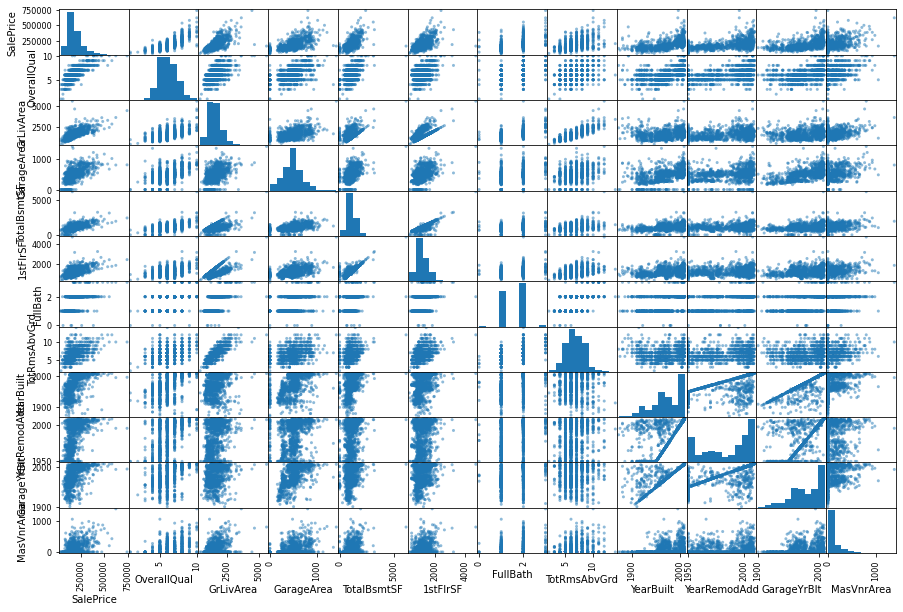

In [14]:
from pandas.plotting import scatter_matrix

attributes = ["SalePrice", "OverallQual", "GrLivArea",
             'GarageArea','TotalBsmtSF', '1stFlrSF', 'FullBath',
              'TotRmsAbvGrd', 'YearBuilt', 'YearRemodAdd','GarageYrBlt', 'MasVnrArea']
pd.plotting.scatter_matrix(housing1[attributes], figsize=(15, 10))


array([[<AxesSubplot:xlabel='SalePrice', ylabel='SalePrice'>,
        <AxesSubplot:xlabel='OverallQual', ylabel='SalePrice'>,
        <AxesSubplot:xlabel='GrLivArea', ylabel='SalePrice'>,
        <AxesSubplot:xlabel='GarageArea', ylabel='SalePrice'>],
       [<AxesSubplot:xlabel='SalePrice', ylabel='OverallQual'>,
        <AxesSubplot:xlabel='OverallQual', ylabel='OverallQual'>,
        <AxesSubplot:xlabel='GrLivArea', ylabel='OverallQual'>,
        <AxesSubplot:xlabel='GarageArea', ylabel='OverallQual'>],
       [<AxesSubplot:xlabel='SalePrice', ylabel='GrLivArea'>,
        <AxesSubplot:xlabel='OverallQual', ylabel='GrLivArea'>,
        <AxesSubplot:xlabel='GrLivArea', ylabel='GrLivArea'>,
        <AxesSubplot:xlabel='GarageArea', ylabel='GrLivArea'>],
       [<AxesSubplot:xlabel='SalePrice', ylabel='GarageArea'>,
        <AxesSubplot:xlabel='OverallQual', ylabel='GarageArea'>,
        <AxesSubplot:xlabel='GrLivArea', ylabel='GarageArea'>,
        <AxesSubplot:xlabel='GarageArea', yla

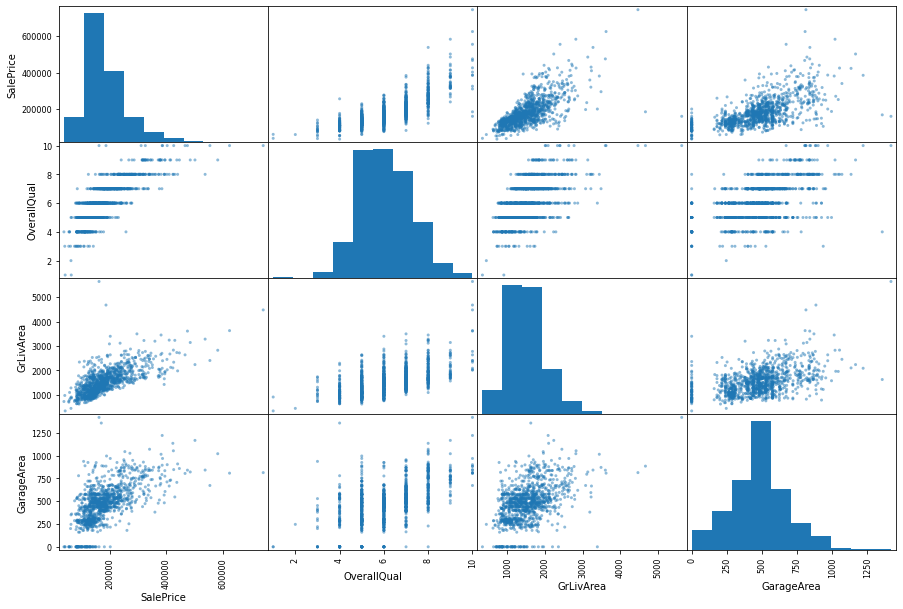

In [15]:
attributes = ["SalePrice", "OverallQual", "GrLivArea",
             'GarageArea']
pd.plotting.scatter_matrix(housing1[attributes], figsize=(15, 10))

### Preparing the Data for Machine Learning Algorithms

In [16]:
housing1 = train_set.drop("SalePrice", axis=1) # drop labels for training set
housing_labels = train_set["SalePrice"].copy()

In [17]:
sample_incomplete_rows = housing1[housing1.isnull().any(axis=1)].head()
sample_incomplete_rows

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
254,255,20,RL,70.0,8400,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,5,6,1957,1957,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,Gd,CBlock,TA,TA,No,Rec,922,Unf,0,392,1314,GasA,TA,Y,SBrkr,1314,0,0,1314,1,0,1,0,3,1,TA,5,Typ,0,NaN,Attchd,1957.0,RFn,1,294,TA,TA,Y,250,0,0,0,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
1066,1067,60,RL,59.0,7837,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,6,7,1993,1994,Gable,CompShg,VinylSd,VinylSd,None,0.0,Gd,TA,PConc,Gd,TA,No,Unf,0,Unf,0,799,799,GasA,Gd,Y,SBrkr,799,772,0,1571,0,0,2,1,3,1,TA,7,Typ,1,TA,Attchd,1993.0,RFn,2,380,TA,TA,Y,0,40,0,0,0,0,NaN,NaN,NaN,0,5,2009,WD,Normal
638,639,30,RL,67.0,8777,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Edwards,Feedr,Norm,1Fam,1Story,5,7,1910,1950,Gable,CompShg,MetalSd,Wd Sdng,None,0.0,TA,TA,CBlock,Fa,TA,No,Unf,0,Unf,0,796,796,GasA,Gd,Y,FuseA,796,0,0,796,0,0,1,0,2,1,TA,4,Typ,0,NaN,NaN,NaN,NaN,0,0,NaN,NaN,P,328,0,164,0,0,0,NaN,MnPrv,NaN,0,5,2008,WD,Normal
799,800,50,RL,60.0,7200,Pave,NaN,Reg,Lvl,AllPub,Corner,Gtl,SWISU,Feedr,Norm,1Fam,1.5Fin,5,7,1937,1950,Gable,CompShg,Wd Sdng,Wd Sdng,BrkFace,252.0,TA,TA,BrkTil,Gd,TA,No,ALQ,569,Unf,0,162,731,GasA,Ex,Y,SBrkr,981,787,0,1768,1,0,1,1,3,1,Gd,7,Typ,2,TA,Detchd,1939.0,Unf,1,240,TA,TA,Y,0,0,264,0,0,0,NaN,MnPrv,NaN,0,6,2007,WD,Normal
380,381,50,RL,50.0,5000,Pave,Pave,Reg,Lvl,AllPub,Inside,Gtl,SWISU,Norm,Norm,1Fam,1.5Fin,5,6,1924,1950,Gable,CompShg,BrkFace,Wd Sdng,None,0.0,TA,TA,BrkTil,TA,TA,No,LwQ,218,Unf,0,808,1026,GasA,TA,Y,SBrkr,1026,665,0,1691,0,0,2,0,3,1,Gd,6,Typ,1,Gd,Detchd,1924.0,Unf,1,308,TA,TA,Y,0,0,242,0,0,0,NaN,NaN,NaN,0,5,2010,WD,Normal


In [18]:
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy="median")

Dropping the Object attributes to perform Imputer Median for missing numerical values

In [19]:
housing_num = housing1.select_dtypes(exclude=['object'])
housing_num.head()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold
254,255,20,70.0,8400,5,6,1957,1957,0.0,922,0,392,1314,1314,0,0,1314,1,0,1,0,3,1,5,0,1957.0,1,294,250,0,0,0,0,0,0,6,2010
1066,1067,60,59.0,7837,6,7,1993,1994,0.0,0,0,799,799,799,772,0,1571,0,0,2,1,3,1,7,1,1993.0,2,380,0,40,0,0,0,0,0,5,2009
638,639,30,67.0,8777,5,7,1910,1950,0.0,0,0,796,796,796,0,0,796,0,0,1,0,2,1,4,0,NaN,0,0,328,0,164,0,0,0,0,5,2008
799,800,50,60.0,7200,5,7,1937,1950,252.0,569,0,162,731,981,787,0,1768,1,0,1,1,3,1,7,2,1939.0,1,240,0,0,264,0,0,0,0,6,2007
380,381,50,50.0,5000,5,6,1924,1950,0.0,218,0,808,1026,1026,665,0,1691,0,0,2,0,3,1,6,1,1924.0,1,308,0,0,242,0,0,0,0,5,2010


In [20]:
imputer.fit(housing_num)

SimpleImputer(strategy='median')

In [21]:
imputer.statistics_

array([7.325e+02, 5.000e+01, 7.000e+01, 9.600e+03, 6.000e+00, 5.000e+00,
       1.972e+03, 1.994e+03, 0.000e+00, 3.845e+02, 0.000e+00, 4.800e+02,
       9.975e+02, 1.095e+03, 0.000e+00, 0.000e+00, 1.473e+03, 0.000e+00,
       0.000e+00, 2.000e+00, 0.000e+00, 3.000e+00, 1.000e+00, 6.000e+00,
       1.000e+00, 1.980e+03, 2.000e+00, 4.820e+02, 0.000e+00, 2.700e+01,
       0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 6.000e+00,
       2.008e+03])

In [22]:
housing_num.median().values

array([7.325e+02, 5.000e+01, 7.000e+01, 9.600e+03, 6.000e+00, 5.000e+00,
       1.972e+03, 1.994e+03, 0.000e+00, 3.845e+02, 0.000e+00, 4.800e+02,
       9.975e+02, 1.095e+03, 0.000e+00, 0.000e+00, 1.473e+03, 0.000e+00,
       0.000e+00, 2.000e+00, 0.000e+00, 3.000e+00, 1.000e+00, 6.000e+00,
       1.000e+00, 1.980e+03, 2.000e+00, 4.820e+02, 0.000e+00, 2.700e+01,
       0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 6.000e+00,
       2.008e+03])

Transform the Training set:

In [23]:
X = imputer.transform(housing_num)

In [24]:
housing_tr = pd.DataFrame(X, columns=housing_num.columns,
                          index=housing1.index)

In [25]:
housing_tr.loc[sample_incomplete_rows.index.values]

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold
254,255.0,20.0,70.0,8400.0,5.0,6.0,1957.0,1957.0,0.0,922.0,0.0,392.0,1314.0,1314.0,0.0,0.0,1314.0,1.0,0.0,1.0,0.0,3.0,1.0,5.0,0.0,1957.0,1.0,294.0,250.0,0.0,0.0,0.0,0.0,0.0,0.0,6.0,2010.0
1066,1067.0,60.0,59.0,7837.0,6.0,7.0,1993.0,1994.0,0.0,0.0,0.0,799.0,799.0,799.0,772.0,0.0,1571.0,0.0,0.0,2.0,1.0,3.0,1.0,7.0,1.0,1993.0,2.0,380.0,0.0,40.0,0.0,0.0,0.0,0.0,0.0,5.0,2009.0
638,639.0,30.0,67.0,8777.0,5.0,7.0,1910.0,1950.0,0.0,0.0,0.0,796.0,796.0,796.0,0.0,0.0,796.0,0.0,0.0,1.0,0.0,2.0,1.0,4.0,0.0,1980.0,0.0,0.0,328.0,0.0,164.0,0.0,0.0,0.0,0.0,5.0,2008.0
799,800.0,50.0,60.0,7200.0,5.0,7.0,1937.0,1950.0,252.0,569.0,0.0,162.0,731.0,981.0,787.0,0.0,1768.0,1.0,0.0,1.0,1.0,3.0,1.0,7.0,2.0,1939.0,1.0,240.0,0.0,0.0,264.0,0.0,0.0,0.0,0.0,6.0,2007.0
380,381.0,50.0,50.0,5000.0,5.0,6.0,1924.0,1950.0,0.0,218.0,0.0,808.0,1026.0,1026.0,665.0,0.0,1691.0,0.0,0.0,2.0,0.0,3.0,1.0,6.0,1.0,1924.0,1.0,308.0,0.0,0.0,242.0,0.0,0.0,0.0,0.0,5.0,2010.0


In [26]:
imputer.strategy

'median'

In [27]:
housing_tr = pd.DataFrame(X, columns=housing_num.columns,
                          index=housing_num.index)
housing_tr.head()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold
254,255.0,20.0,70.0,8400.0,5.0,6.0,1957.0,1957.0,0.0,922.0,0.0,392.0,1314.0,1314.0,0.0,0.0,1314.0,1.0,0.0,1.0,0.0,3.0,1.0,5.0,0.0,1957.0,1.0,294.0,250.0,0.0,0.0,0.0,0.0,0.0,0.0,6.0,2010.0
1066,1067.0,60.0,59.0,7837.0,6.0,7.0,1993.0,1994.0,0.0,0.0,0.0,799.0,799.0,799.0,772.0,0.0,1571.0,0.0,0.0,2.0,1.0,3.0,1.0,7.0,1.0,1993.0,2.0,380.0,0.0,40.0,0.0,0.0,0.0,0.0,0.0,5.0,2009.0
638,639.0,30.0,67.0,8777.0,5.0,7.0,1910.0,1950.0,0.0,0.0,0.0,796.0,796.0,796.0,0.0,0.0,796.0,0.0,0.0,1.0,0.0,2.0,1.0,4.0,0.0,1980.0,0.0,0.0,328.0,0.0,164.0,0.0,0.0,0.0,0.0,5.0,2008.0
799,800.0,50.0,60.0,7200.0,5.0,7.0,1937.0,1950.0,252.0,569.0,0.0,162.0,731.0,981.0,787.0,0.0,1768.0,1.0,0.0,1.0,1.0,3.0,1.0,7.0,2.0,1939.0,1.0,240.0,0.0,0.0,264.0,0.0,0.0,0.0,0.0,6.0,2007.0
380,381.0,50.0,50.0,5000.0,5.0,6.0,1924.0,1950.0,0.0,218.0,0.0,808.0,1026.0,1026.0,665.0,0.0,1691.0,0.0,0.0,2.0,0.0,3.0,1.0,6.0,1.0,1924.0,1.0,308.0,0.0,0.0,242.0,0.0,0.0,0.0,0.0,5.0,2010.0


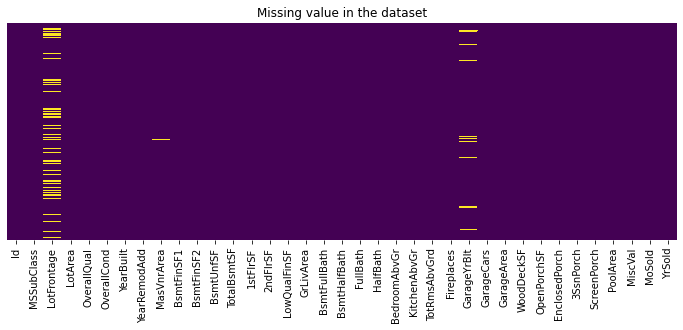

In [28]:
plt.figure(figsize=(12,4))
sns.heatmap(housing_num.isnull(),cbar=False,cmap='viridis',yticklabels=False)
plt.title('Missing value in the dataset');

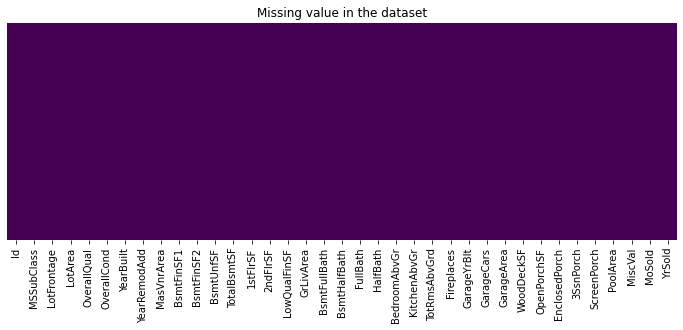

In [29]:
plt.figure(figsize=(12,4))
sns.heatmap(housing_tr.isnull(),cbar=False,cmap='viridis',yticklabels=False)
plt.title('Missing value in the dataset');

In [30]:
housing_cat = housing1.select_dtypes('object')
housing_cat.head(10)

,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,Heating,HeatingQC,CentralAir,Electrical,KitchenQual,Functional,FireplaceQu,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
254,RL,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,Gable,CompShg,MetalSd,MetalSd,None,TA,Gd,CBlock,TA,TA,No,Rec,Unf,GasA,TA,Y,SBrkr,TA,Typ,NaN,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
1066,RL,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,None,Gd,TA,PConc,Gd,TA,No,Unf,Unf,GasA,Gd,Y,SBrkr,TA,Typ,TA,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
638,RL,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Edwards,Feedr,Norm,1Fam,1Story,Gable,CompShg,MetalSd,Wd Sdng,None,TA,TA,CBlock,Fa,TA,No,Unf,Unf,GasA,Gd,Y,FuseA,TA,Typ,NaN,NaN,NaN,NaN,NaN,P,NaN,MnPrv,NaN,WD,Normal
799,RL,Pave,NaN,Reg,Lvl,AllPub,Corner,Gtl,SWISU,Feedr,Norm,1Fam,1.5Fin,Gable,CompShg,Wd Sdng,Wd Sdng,BrkFace,TA,TA,BrkTil,Gd,TA,No,ALQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,TA,Detchd,Unf,TA,TA,Y,NaN,MnPrv,NaN,WD,Normal
380,RL,Pave,Pave,Reg,Lvl,AllPub,Inside,Gtl,SWISU,Norm,Norm,1Fam,1.5Fin,Gable,CompShg,BrkFace,Wd Sdng,None,TA,TA,BrkTil,TA,TA,No,LwQ,Unf,GasA,TA,Y,SBrkr,Gd,Typ,Gd,Detchd,Unf,TA,TA,Y,NaN,NaN,NaN,WD,Normal
303,RL,Pave,NaN,Reg,Lvl,AllPub,Corner,Gtl,CollgCr,Norm,Norm,1Fam,1Story,Gable,CompShg,VinylSd,VinylSd,None,TA,TA,PConc,TA,TA,No,ALQ,Unf,GasA,TA,Y,SBrkr,TA,Typ,NaN,Attchd,Unf,TA,TA,Y,NaN,GdWo,NaN,WD,Abnorml
86,RL,Pave,NaN,IR2,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,None,Gd,TA,PConc,Gd,TA,Av,Unf,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,Gd,BuiltIn,Fin,TA,TA,Y,NaN,NaN,NaN,WD,Normal
1385,RM,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,IDOTRR,Norm,Norm,1Fam,1.5Fin,Gable,CompShg,VinylSd,VinylSd,None,TA,Gd,BrkTil,TA,TA,No,BLQ,Unf,GasA,Gd,Y,SBrkr,Gd,Typ,NaN,Detchd,Unf,TA,TA,N,NaN,MnPrv,NaN,WD,Normal
265,RL,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,NWAmes,Norm,Norm,1Fam,1Story,Gable,CompShg,MetalSd,MetalSd,BrkFace,TA,Gd,CBlock,Gd,TA,No,GLQ,LwQ,GasA,TA,Y,SBrkr,Gd,Typ,TA,Attchd,Fin,TA,TA,Y,NaN,GdPrv,NaN,WD,Normal
793,RL,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Somerst,Norm,Norm,1Fam,1Story,Gable,CompShg,CemntBd,CmentBd,Stone,Gd,TA,PConc,Gd,TA,Av,Unf,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,NaN,Attchd,Fin,TA,TA,Y,NaN,NaN,NaN,New,Partial


Handling NaN Values 

In [31]:
imp = SimpleImputer(missing_values=np.nan, strategy='most_frequent')

In [32]:
imp.fit(housing_cat)

SimpleImputer(strategy='most_frequent')

In [33]:
a = imp.transform(housing_cat)

In [34]:
housing_object = pd.DataFrame(a, columns=housing_cat.columns,
                          index=housing1.index)

In [35]:
housing_object.loc[sample_incomplete_rows.index.values]

,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,Heating,HeatingQC,CentralAir,Electrical,KitchenQual,Functional,FireplaceQu,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
254,RL,Pave,Grvl,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,Gable,CompShg,MetalSd,MetalSd,None,TA,Gd,CBlock,TA,TA,No,Rec,Unf,GasA,TA,Y,SBrkr,TA,Typ,Gd,Attchd,RFn,TA,TA,Y,Ex,MnPrv,Shed,WD,Normal
1066,RL,Pave,Grvl,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,None,Gd,TA,PConc,Gd,TA,No,Unf,Unf,GasA,Gd,Y,SBrkr,TA,Typ,TA,Attchd,RFn,TA,TA,Y,Ex,MnPrv,Shed,WD,Normal
638,RL,Pave,Grvl,Reg,Lvl,AllPub,Inside,Gtl,Edwards,Feedr,Norm,1Fam,1Story,Gable,CompShg,MetalSd,Wd Sdng,None,TA,TA,CBlock,Fa,TA,No,Unf,Unf,GasA,Gd,Y,FuseA,TA,Typ,Gd,Attchd,Unf,TA,TA,P,Ex,MnPrv,Shed,WD,Normal
799,RL,Pave,Grvl,Reg,Lvl,AllPub,Corner,Gtl,SWISU,Feedr,Norm,1Fam,1.5Fin,Gable,CompShg,Wd Sdng,Wd Sdng,BrkFace,TA,TA,BrkTil,Gd,TA,No,ALQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,TA,Detchd,Unf,TA,TA,Y,Ex,MnPrv,Shed,WD,Normal
380,RL,Pave,Pave,Reg,Lvl,AllPub,Inside,Gtl,SWISU,Norm,Norm,1Fam,1.5Fin,Gable,CompShg,BrkFace,Wd Sdng,None,TA,TA,BrkTil,TA,TA,No,LwQ,Unf,GasA,TA,Y,SBrkr,Gd,Typ,Gd,Detchd,Unf,TA,TA,Y,Ex,MnPrv,Shed,WD,Normal


In [36]:
imp.strategy

'most_frequent'

In [37]:
housing_object = pd.DataFrame(a, columns=housing_cat.columns,
                          index=housing_cat.index)
housing_object.head()

,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,Heating,HeatingQC,CentralAir,Electrical,KitchenQual,Functional,FireplaceQu,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
254,RL,Pave,Grvl,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,Gable,CompShg,MetalSd,MetalSd,None,TA,Gd,CBlock,TA,TA,No,Rec,Unf,GasA,TA,Y,SBrkr,TA,Typ,Gd,Attchd,RFn,TA,TA,Y,Ex,MnPrv,Shed,WD,Normal
1066,RL,Pave,Grvl,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,None,Gd,TA,PConc,Gd,TA,No,Unf,Unf,GasA,Gd,Y,SBrkr,TA,Typ,TA,Attchd,RFn,TA,TA,Y,Ex,MnPrv,Shed,WD,Normal
638,RL,Pave,Grvl,Reg,Lvl,AllPub,Inside,Gtl,Edwards,Feedr,Norm,1Fam,1Story,Gable,CompShg,MetalSd,Wd Sdng,None,TA,TA,CBlock,Fa,TA,No,Unf,Unf,GasA,Gd,Y,FuseA,TA,Typ,Gd,Attchd,Unf,TA,TA,P,Ex,MnPrv,Shed,WD,Normal
799,RL,Pave,Grvl,Reg,Lvl,AllPub,Corner,Gtl,SWISU,Feedr,Norm,1Fam,1.5Fin,Gable,CompShg,Wd Sdng,Wd Sdng,BrkFace,TA,TA,BrkTil,Gd,TA,No,ALQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,TA,Detchd,Unf,TA,TA,Y,Ex,MnPrv,Shed,WD,Normal
380,RL,Pave,Pave,Reg,Lvl,AllPub,Inside,Gtl,SWISU,Norm,Norm,1Fam,1.5Fin,Gable,CompShg,BrkFace,Wd Sdng,None,TA,TA,BrkTil,TA,TA,No,LwQ,Unf,GasA,TA,Y,SBrkr,Gd,Typ,Gd,Detchd,Unf,TA,TA,Y,Ex,MnPrv,Shed,WD,Normal


In [38]:
from sklearn.preprocessing import OrdinalEncoder # just to raise an ImportError if Scikit-Learn < 0.20
from sklearn.preprocessing import OneHotEncoder

In [39]:
from sklearn.preprocessing import OrdinalEncoder
ordinal_encoder = OrdinalEncoder()
housing_cat_encoded = ordinal_encoder.fit_transform(housing_object)
housing_cat_encoded[:5]

array([[ 3.,  1.,  0.,  3.,  3.,  0.,  4.,  0., 12.,  2.,  2.,  0.,  2.,
         1.,  1.,  8.,  8.,  2.,  3.,  2.,  1.,  3.,  3.,  3.,  4.,  5.,
         1.,  4.,  1.,  3.,  3.,  6.,  2.,  1.,  1.,  4.,  4.,  2.,  0.,
         2.,  2.,  8.,  4.],
       [ 3.,  1.,  0.,  0.,  3.,  0.,  4.,  0.,  8.,  2.,  2.,  0.,  5.,
         1.,  1., 12., 13.,  2.,  2.,  4.,  2.,  2.,  3.,  3.,  5.,  5.,
         1.,  2.,  1.,  3.,  3.,  6.,  4.,  1.,  1.,  4.,  4.,  2.,  0.,
         2.,  2.,  8.,  4.],
       [ 3.,  1.,  0.,  3.,  3.,  0.,  4.,  0.,  7.,  1.,  2.,  0.,  2.,
         1.,  1.,  8., 14.,  2.,  3.,  4.,  1.,  1.,  3.,  3.,  5.,  5.,
         1.,  2.,  1.,  0.,  3.,  6.,  2.,  1.,  2.,  4.,  4.,  1.,  0.,
         2.,  2.,  8.,  4.],
       [ 3.,  1.,  0.,  3.,  3.,  0.,  0.,  0., 18.,  1.,  2.,  0.,  0.,
         1.,  1., 13., 14.,  1.,  3.,  4.,  0.,  2.,  3.,  3.,  0.,  5.,
         1.,  0.,  1.,  3.,  2.,  6.,  4.,  5.,  2.,  4.,  4.,  2.,  0.,
         2.,  2.,  8.,  4.],
       [

We have done replace the NaN in categorical values,

We have done shifting the object types into numbers categorical 

Now, we are missing the part combining all attributes into 1 place, or call Pipeline

 ### Transformation Pipelines

We will transform 2 pipelines here which are numerical pipeline and categorical pipeline. 
in the function, we have to create all transformation we have done along the way of creating the pipeline

In [40]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler


num_pipeline = Pipeline([
        ('imputer', SimpleImputer(strategy="median")),
        ('std_scaler', StandardScaler()),

    ])

housing_num_tr = num_pipeline.fit_transform(housing_num)

In [41]:
housing_num_tr

array([[-1.11928402, -0.8667643 , -0.01246836, ..., -0.09274033,
        -0.13341669,  1.65006527],
       [ 0.79046412,  0.07410996, -0.50235683, ..., -0.09274033,
        -0.5080097 ,  0.89367742],
       [-0.21615189, -0.63154574, -0.14607431, ..., -0.09274033,
        -0.5080097 ,  0.13728958],
       ...,
       [ 1.32669882, -0.8667643 , -0.45782152, ..., -0.09274033,
        -0.88260272, -1.37548612],
       [ 0.30597137, -0.16110861, -0.6804981 , ..., -0.09274033,
        -0.13341669, -0.61909827],
       [ 0.93157852,  1.48542135, -0.76956873, ..., -0.09274033,
        -0.13341669,  0.89367742]])

In [42]:
cat_pipeline = Pipeline([
        ('imp', SimpleImputer(strategy="most_frequent")),
        ('cat_encoder', OrdinalEncoder()),

    ])

housing_object_tr = cat_pipeline.fit_transform(housing_object)

In [43]:
housing_object_tr

array([[3., 1., 0., ..., 2., 8., 4.],
       [3., 1., 0., ..., 2., 8., 4.],
       [3., 1., 0., ..., 2., 8., 4.],
       ...,
       [3., 1., 0., ..., 2., 8., 4.],
       [3., 1., 0., ..., 2., 8., 4.],
       [3., 1., 0., ..., 2., 8., 4.]])

In [44]:
from sklearn.compose import ColumnTransformer

num_attribs = list(housing_num)
cat_attribs = list(housing_object)

full_pipeline = ColumnTransformer([
        ("num", num_pipeline, num_attribs),
        ("cat", OneHotEncoder(), cat_attribs),
    ])

housing_prepared = full_pipeline.fit_transform(housing1)

In [45]:
housing_prepared

<1168x303 sparse matrix of type '<class 'numpy.float64'>'
	with 93440 stored elements in Compressed Sparse Row format>

In [46]:
housing_prepared.shape

(1168, 303)

### Select and Train a Model

In [47]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(housing_prepared, housing_labels)

LinearRegression()

In [48]:
# let's try the full preprocessing pipeline on a few training instances
some_data = housing1.iloc[:5]
some_labels = housing_labels.iloc[:5]
some_data_prepared = full_pipeline.transform(some_data)

print("Predictions:", lin_reg.predict(some_data_prepared))

Predictions: [145009.47381841 169997.1608164   95300.33131803 165428.97617783
 170389.24500802]


In [49]:
print("Labels:", list(some_labels))

Labels: [145000, 178000, 85000, 175000, 127000]


In [50]:
from sklearn.metrics import mean_squared_error

housing_predictions = lin_reg.predict(housing_prepared)
lin_mse = mean_squared_error(housing_labels, housing_predictions)
lin_rmse = np.sqrt(lin_mse)
lin_rmse

18895.24619683099

In [51]:
from sklearn.metrics import mean_absolute_error

lin_mae = mean_absolute_error(housing_labels, housing_predictions)
lin_mae

12123.01103933788

In [52]:
from sklearn.tree import DecisionTreeRegressor

tree_reg = DecisionTreeRegressor(random_state=42)
tree_reg.fit(housing_prepared, housing_labels)

DecisionTreeRegressor(random_state=42)

In [53]:
housing_predictions = tree_reg.predict(housing_prepared)
tree_mse = mean_squared_error(housing_labels, housing_predictions)
tree_rmse = np.sqrt(tree_mse)
tree_rmse

0.0

## Fine-Tune the Model

In [54]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(tree_reg, housing_prepared, housing_labels,
                         scoring="neg_mean_squared_error", cv=10)
tree_rmse_scores = np.sqrt(-scores)

In [55]:
def display_scores(scores):
    print("Scores:", scores)
    print("Mean:", scores.mean())
    print("Standard deviation:", scores.std())

display_scores(tree_rmse_scores)

Scores: [33912.27777689 63208.69654889 46239.33549498 45029.74925317
 59543.47186375 44183.99725749 38500.01553646 33369.65843487
 41767.77616497 31137.32411099]
Mean: 43689.23024424724
Standard deviation: 10154.624606880194


In [56]:
lin_scores = cross_val_score(lin_reg, housing_prepared, housing_labels,
                             scoring="neg_mean_squared_error", cv=10)
lin_rmse_scores = np.sqrt(-lin_scores)
display_scores(lin_rmse_scores)

Scores: [109973.31120196  32851.96536951  22502.28941148  46520.89102799
 104483.71927691  29512.87455085  50644.74658588  21394.5267127
  46806.96381854  26713.464207  ]
Mean: 49140.47521628339
Standard deviation: 30677.41614182412


In [57]:
from sklearn.ensemble import RandomForestRegressor

forest_reg = RandomForestRegressor(n_estimators=10, random_state=42)
forest_reg.fit(housing_prepared, housing_labels)

RandomForestRegressor(n_estimators=10, random_state=42)

In [58]:
housing_predictions = forest_reg.predict(housing_prepared)
forest_mse = mean_squared_error(housing_labels, housing_predictions)
forest_rmse = np.sqrt(forest_mse)
forest_rmse

14165.171999141305

In [59]:

from sklearn.model_selection import cross_val_score

forest_scores = cross_val_score(forest_reg, housing_prepared, housing_labels,
                                scoring="neg_mean_squared_error", cv=10)
forest_rmse_scores = np.sqrt(-forest_scores)
display_scores(forest_rmse_scores)

Scores: [22803.000877   34316.45185275 30177.51740189 44644.35594216
 42731.80442123 38174.91474505 29340.80390996 24524.51871894
 29561.11628323 29330.81986924]
Mean: 32560.53040214429
Standard deviation: 6923.423990896025


In [60]:
scores = cross_val_score(lin_reg, housing_prepared, housing_labels, scoring="neg_mean_squared_error", cv=10)
pd.Series(np.sqrt(-scores)).describe()

count        10.000000
mean      49140.475216
std       32336.835912
min       21394.526713
25%       27413.316793
50%       39686.428199
75%       49685.300894
max      109973.311202
dtype: float64

In [61]:
from sklearn.svm import SVR

svm_reg = SVR(kernel="linear")
svm_reg.fit(housing_prepared, housing_labels)
housing_predictions = svm_reg.predict(housing_prepared)
svm_mse = mean_squared_error(housing_labels, housing_predictions)
svm_rmse = np.sqrt(svm_mse)
svm_rmse

72702.46410257564

In [62]:
from sklearn.model_selection import GridSearchCV

param_grid = [
    # try 12 (3×4) combinations of hyperparameters
    {'n_estimators': [3, 10, 30], 'max_features': [2, 4, 6, 8]},
    # then try 6 (2×3) combinations with bootstrap set as False
    {'bootstrap': [False], 'n_estimators': [3, 10], 'max_features': [2, 3, 4]},
  ]

forest_reg = RandomForestRegressor(random_state=42)
# train across 5 folds, that's a total of (12+6)*5=90 rounds of training 
grid_search = GridSearchCV(forest_reg, param_grid, cv=5,
                           scoring='neg_mean_squared_error', return_train_score=True)
grid_search.fit(housing_prepared, housing_labels)

GridSearchCV(cv=5, estimator=RandomForestRegressor(random_state=42),
             param_grid=[{'max_features': [2, 4, 6, 8],
                          'n_estimators': [3, 10, 30]},
                         {'bootstrap': [False], 'max_features': [2, 3, 4],
                          'n_estimators': [3, 10]}],
             return_train_score=True, scoring='neg_mean_squared_error')

In [63]:
grid_search.best_params_

{'max_features': 8, 'n_estimators': 30}

In [64]:
grid_search.best_estimator_

RandomForestRegressor(max_features=8, n_estimators=30, random_state=42)

In [65]:
cvres = grid_search.cv_results_
for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
    print(np.sqrt(-mean_score), params)

47465.4506831526 {'max_features': 2, 'n_estimators': 3}
40366.94297207973 {'max_features': 2, 'n_estimators': 10}
37866.19765261078 {'max_features': 2, 'n_estimators': 30}
43808.842455380385 {'max_features': 4, 'n_estimators': 3}
37249.56266792181 {'max_features': 4, 'n_estimators': 10}
35599.53837760769 {'max_features': 4, 'n_estimators': 30}
43047.34295216747 {'max_features': 6, 'n_estimators': 3}
37345.66852589556 {'max_features': 6, 'n_estimators': 10}
34003.97730105536 {'max_features': 6, 'n_estimators': 30}
40026.12065126527 {'max_features': 8, 'n_estimators': 3}
34578.08241481353 {'max_features': 8, 'n_estimators': 10}
33566.36870013543 {'max_features': 8, 'n_estimators': 30}
48594.0942800816 {'bootstrap': False, 'max_features': 2, 'n_estimators': 3}
40173.91264117382 {'bootstrap': False, 'max_features': 2, 'n_estimators': 10}
46471.454747046555 {'bootstrap': False, 'max_features': 3, 'n_estimators': 3}
37853.0536568913 {'bootstrap': False, 'max_features': 3, 'n_estimators': 10}

In [66]:
pd.DataFrame(grid_search.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_features,param_n_estimators,param_bootstrap,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.018263,0.001054,0.001618,0.000035,2,3,NaN,"{'max_features': 2, 'n_estimators': 3}",-2.188099e+09,-1.691913e+09,-3.228897e+09,-2.230442e+09,-1.925494e+09,-2.252969e+09,5.251998e+08,17,-5.201283e+08,-7.496183e+08,-5.070292e+08,-5.611587e+08,-5.903459e+08,-5.856561e+08,8.715709e+07
1,0.051666,0.000440,0.002662,0.000041,2,10,NaN,"{'max_features': 2, 'n_estimators': 10}",-2.136514e+09,-1.198532e+09,-1.978446e+09,-1.475833e+09,-1.358126e+09,-1.629490e+09,3.638179e+08,12,-2.924154e+08,-3.082395e+08,-2.666160e+08,-2.721010e+08,-2.765984e+08,-2.831941e+08,1.519013e+07
2,0.154921,0.007773,0.006038,0.000787,2,30,NaN,"{'max_features': 2, 'n_estimators': 30}",-1.784700e+09,-1.112550e+09,-1.850076e+09,-1.303695e+09,-1.118223e+09,-1.433849e+09,3.212895e+08,9,-2.224253e+08,-2.242610e+08,-1.753880e+08,-2.118612e+08,-2.070682e+08,-2.082007e+08,1.761607e+07
3,0.019748,0.000269,0.001620,0.000031,4,3,NaN,"{'max_features': 4, 'n_estimators': 3}",-1.792160e+09,-1.686030e+09,-2.442911e+09,-1.861879e+09,-1.813093e+09,-1.919215e+09,2.680765e+08,15,-4.695235e+08,-5.594531e+08,-4.638199e+08,-5.199879e+08,-5.099184e+08,-5.045406e+08,3.512064e+07
4,0.059633,0.003278,0.002769,0.000131,4,10,NaN,"{'max_features': 4, 'n_estimators': 10}",-1.405621e+09,-1.027116e+09,-2.366457e+09,-1.101845e+09,-1.036610e+09,-1.387530e+09,5.085834e+08,5,-2.704633e+08,-2.614081e+08,-2.312004e+08,-2.570791e+08,-2.319978e+08,-2.504297e+08,1.597239e+07
5,0.164478,0.001179,0.005609,0.000074,4,30,NaN,"{'max_features': 4, 'n_estimators': 30}",-1.481873e+09,-1.031431e+09,-1.930288e+09,-1.025824e+09,-8.672193e+08,-1.267327e+09,3.897704e+08,4,-1.947387e+08,-1.960215e+08,-1.585721e+08,-1.875963e+08,-1.816850e+08,-1.837227e+08,1.359650e+07
6,0.021681,0.000230,0.001591,0.000023,6,3,NaN,"{'max_features': 6, 'n_estimators': 3}",-1.550916e+09,-1.776153e+09,-3.232120e+09,-1.522383e+09,-1.183797e+09,-1.853074e+09,7.150206e+08,13,-4.170300e+08,-4.426460e+08,-4.796608e+08,-4.810199e+08,-5.618228e+08,-4.764359e+08,4.897584e+07
7,0.063437,0.000358,0.002629,0.000054,6,10,NaN,"{'max_features': 6, 'n_estimators': 10}",-1.354143e+09,-1.139911e+09,-2.363593e+09,-1.178514e+09,-9.373342e+08,-1.394699e+09,5.022421e+08,7,-2.630317e+08,-2.405379e+08,-2.532035e+08,-2.498637e+08,-2.410873e+08,-2.495448e+08,8.343117e+06
8,0.184401,0.001040,0.005729,0.000294,6,30,NaN,"{'max_features': 6, 'n_estimators': 30}",-1.277186e+09,-9.855382e+08,-1.725444e+09,-9.382901e+08,-8.548938e+08,-1.156270e+09,3.181422e+08,2,-2.036413e+08,-1.839595e+08,-1.622059e+08,-1.897488e+08,-1.859599e+08,-1.851031e+08,1.335344e+07
9,0.023616,0.000266,0.001628,0.000029,8,3,NaN,"{'max_features': 8, 'n_estimators': 3}",-1.598278e+09,-1.714973e+09,-1.876245e+09,-1.730467e+09,-1.090488e+09,-1.602090e+09,2.706050e+08,10,-4.716115e+08,-5.152342e+08,-3.771224e+08,-5.199142e+08,-4.461922e+08,-4.660149e+08,5.225671e+07


In [67]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

param_distribs = {
        'n_estimators': randint(low=1, high=200),
        'max_features': randint(low=1, high=8),
    }

forest_reg = RandomForestRegressor(random_state=42)
rnd_search = RandomizedSearchCV(forest_reg, param_distributions=param_distribs,
                                n_iter=10, cv=5, scoring='neg_mean_squared_error', random_state=42)
rnd_search.fit(housing_prepared, housing_labels)

RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(random_state=42),
                   param_distributions={'max_features': <scipy.stats._distn_infrastructure.rv_frozen object at 0x7f2fa0d2b5d0>,
                                        'n_estimators': <scipy.stats._distn_infrastructure.rv_frozen object at 0x7f2fa0d2bb10>},
                   random_state=42, scoring='neg_mean_squared_error')

In [68]:
cvres = rnd_search.cv_results_
for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
    print(np.sqrt(-mean_score), params)

33359.284735757974 {'max_features': 7, 'n_estimators': 180}
36140.183935119225 {'max_features': 5, 'n_estimators': 15}
35493.57766184614 {'max_features': 3, 'n_estimators': 72}
35651.97080799044 {'max_features': 5, 'n_estimators': 21}
33312.23204726701 {'max_features': 7, 'n_estimators': 122}
35573.338065238095 {'max_features': 3, 'n_estimators': 75}
35628.04362052851 {'max_features': 3, 'n_estimators': 88}
34638.16563716928 {'max_features': 5, 'n_estimators': 100}
35425.463979383676 {'max_features': 3, 'n_estimators': 150}
46976.46036866364 {'max_features': 5, 'n_estimators': 2}


In [69]:
feature_importances = grid_search.best_estimator_.feature_importances_
feature_importances

array([4.44526238e-03, 2.95011512e-03, 9.28616454e-03, 1.94443370e-02,
       5.62668322e-02, 4.20923146e-03, 2.34987475e-02, 2.09600598e-02,
       1.44000060e-02, 1.91432742e-02, 1.14142226e-03, 9.41939133e-03,
       4.11978791e-02, 3.00309432e-02, 2.25085610e-02, 2.15927721e-04,
       6.26166758e-02, 6.42103944e-03, 4.37942324e-04, 2.25270570e-02,
       6.63424202e-03, 6.16470633e-03, 1.10088390e-03, 2.76080096e-02,
       1.11713086e-02, 2.48867611e-02, 3.62777054e-02, 3.57929830e-02,
       1.13844473e-02, 2.02237884e-02, 9.93660515e-04, 3.08003501e-04,
       1.18429378e-03, 4.27716951e-03, 1.21429525e-04, 6.15731476e-03,
       3.50351244e-03, 2.33508599e-06, 3.42733298e-04, 7.20696188e-05,
       1.75461147e-03, 1.90387523e-03, 8.78283026e-06, 3.32419814e-06,
       2.43171242e-04, 5.38522792e-04, 1.46923952e-04, 2.21400249e-03,
       1.38202798e-03, 1.21535756e-03, 4.37242793e-03, 2.39104907e-04,
       1.21437826e-03, 3.63459533e-04, 1.58049706e-03, 1.25695478e-06,
      

In [70]:
cat_encoder = full_pipeline.named_transformers_["cat"]
cat_one_hot_attribs = list(cat_encoder.categories_[0])
attributes = num_attribs + cat_one_hot_attribs
sorted(zip(feature_importances, attributes), reverse=True)

[(0.06261667580692105, 'GrLivArea'),
 (0.05626683215478799, 'OverallQual'),
 (0.041197879111214496, 'TotalBsmtSF'),
 (0.036277705400902534, 'GarageCars'),
 (0.035792983010328516, 'GarageArea'),
 (0.030030943248315737, '1stFlrSF'),
 (0.02760800960396362, 'TotRmsAbvGrd'),
 (0.024886761123772992, 'GarageYrBlt'),
 (0.023498747497245034, 'YearBuilt'),
 (0.022527057015073453, 'FullBath'),
 (0.02250856101245493, '2ndFlrSF'),
 (0.020960059818207033, 'YearRemodAdd'),
 (0.02022378844144977, 'OpenPorchSF'),
 (0.019444336955443356, 'LotArea'),
 (0.019143274215876038, 'BsmtFinSF1'),
 (0.014400006010594381, 'MasVnrArea'),
 (0.0113844472617331, 'WoodDeckSF'),
 (0.011171308566016107, 'Fireplaces'),
 (0.009419391328878842, 'BsmtUnfSF'),
 (0.009286164538636869, 'LotFrontage'),
 (0.00663424201537259, 'HalfBath'),
 (0.006421039441839968, 'BsmtFullBath'),
 (0.006164706328970906, 'BedroomAbvGr'),
 (0.0061573147589181745, 'MoSold'),
 (0.004445262377812161, 'Id'),
 (0.004277169512346057, 'PoolArea'),
 (0.0042

## Conclusion

The prediction could have done better by trying with some combinations with the attributes.